# Submitted By: Nikita Shrestha

# Problem Statement
Use line segment detection (LSD) provided to you (check d2l), and do the following:
1. Automate a system that can compute the total number of line segments from the provided image
2. Show which line segment is the biggest in length.
3. Compute centroid points (including two extreme points) from each line segment. You should be able to
generate coordinates (x, y) from all line segments and save them in text file.

# Methodology

## 1. Import necessary libraries

In [3]:
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## 2. Read image

In [4]:
bgr_img = cv.imread("data/photo1.jpg")

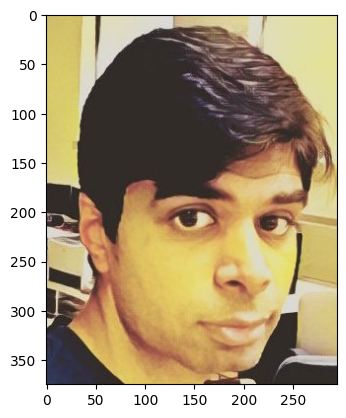

In [3]:
# Plot original image
plt.imshow(cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB))

## 3. Convert to Grayscale
We will convert the given RGB image to grayscale.

In [5]:
# Convert BGR image to grayscale
grayscale_img = cv.cvtColor(bgr_img, cv.COLOR_BGR2GRAY)

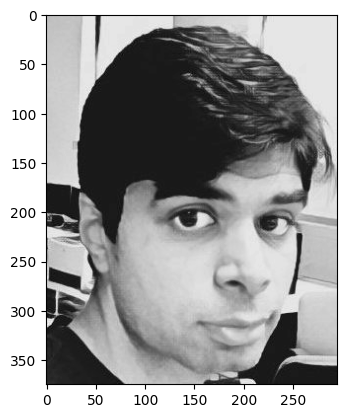

In [5]:
# Plot grayscale image
plt.imshow(grayscale_img, cmap='gray')

## 4. Edge Feature extraction

The edge features are extracted using canny edge detection algorithm. Before detecting edge, we will apply gaussian blur to smooth image and remove any noise.

In [6]:
# 1. Apply Gaussian blur

gaussian_blur = cv.GaussianBlur(grayscale_img, (5,5), 1)

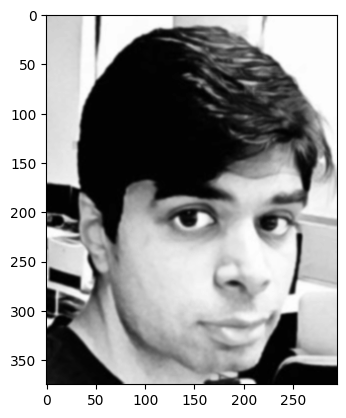

In [7]:
plt.imshow(gaussian_blur, cmap='gray')

In [7]:
# 2. Canny Edge Detection
edges = cv.Canny(image=gaussian_blur, threshold1=50, threshold2=100,  apertureSize=3, L2gradient = True)

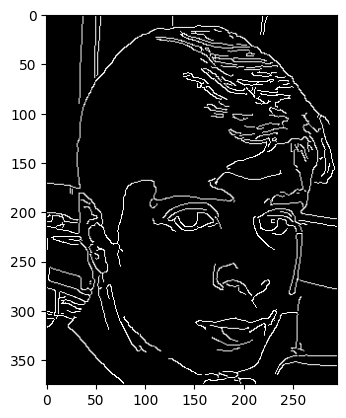

In [10]:
plt.imshow(edges, cmap='gray')

## 5. Line Detection

In [23]:
def get_line_segments(edges):
    rho = 1  # distance resolution in pixels of the Hough grid
    theta = np.pi / 180  # angular resolution in radians of the Hough grid
    threshold = 25  # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 30  # minimum number of pixels making up a line
    max_line_gap = 4  # maximum gap in pixels between connectable line segments

    lines = cv.HoughLinesP(edges, rho, theta, threshold, min_line_length, max_line_gap)
    
    return lines

In [24]:
lines = get_line_segments(edges)
num_lines = len(lines)
print("The total number of lines in the image is : {0}".format(num_lines))

The total number of lines in the image is : 178


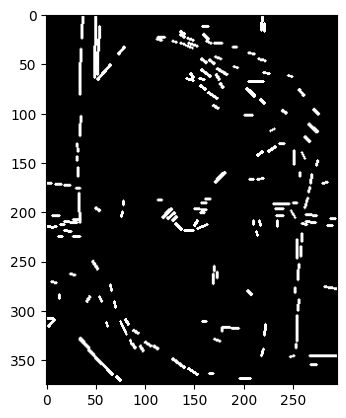

In [25]:
all_line_segments = np.copy(bgr_img) * 0

for line in lines:
    for x1,y1,x2,y2 in line:
        # Draw line
        cv.line(all_line_segments, (x1, y1), (x2, y2), (255,255, 255), 2)
        
plt.imshow(all_line_segments)

## 6. Calculate longest line

In [14]:
def calculate_max_distance(lines):
    max_dis = 0 # Variable to store maximum length of a line
    for line in lines:
        for x1,y1,x2,y2 in line:
            d = math.sqrt((x2-x1)**2 + (y2-y1)**2)
            if d > max_dis:
                max_dis = d
                p1 = (x1, y1) # End point 1 of longest line
                p2 = (x2, y2) # End point 2 of longest line
    return max_dis, p1, p2

In [15]:
max_dist, p1, p2 = calculate_max_distance(lines)

print("The length of longest line is {0}".format(max_dist))

The length of longest line is 34.655446902326915


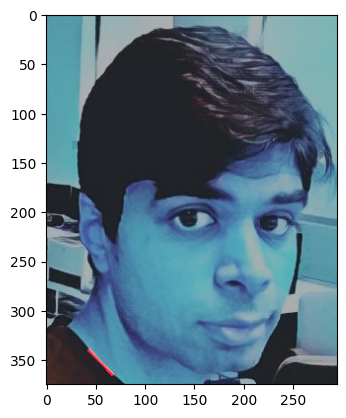

In [16]:
longest_line = np.copy(bgr_img) * 0

# Draw longest line
cv.line(longest_line, p1, p2, (255,0,0), 2)

# Draw the longest line on the  image
longest_line_img = cv.addWeighted(bgr_img, 0.8, longest_line, 1, 0)

plt.imshow(longest_line_img)

## 7. Save all line segment co-ordinates

In [17]:
"""
A function to save the line segments in a text file
"""
def save_line_segments(lines, file_name):
    for line in lines:
        for x1,y1,x2,y2 in line:
            with open(file_name, 'a') as f:
                d = math.sqrt((x2-x1)**2 + (y2-y1)**2)
                x, y = (x1+x2)/2, (y1+y2)/2
                f.write('{0}, {1}, {2}, {3}, {4}, {5}\n'.format(x1, y1, x2, y2, x, y, d))

In [18]:
"""
Format of output file (lines.text)

x1, y1, x2, y2, x, y, d , 

where x1, y1, x2, y2 are two end points of line segments detected, 
x and y are the centroid, and d is the distance of the line segment.
"""
save_line_segments(lines, "data/lines.txt")